In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

In [2]:
# Load dataset
file_path = "/content/vaccination_all_tweets.csv"
df = pd.read_csv(file_path)

In [3]:
# Convert date column to datetime if available
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

In [5]:
# Apply sentiment analysis using TextBlob
df['sentiment_score'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [6]:
# Classify sentiment based on polarity score
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))

In [7]:
# Count sentiment distribution
sentiment_counts = df['sentiment'].value_counts()

<ipython-input-8-49d57f385a15>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green', 'gray', 'red'])


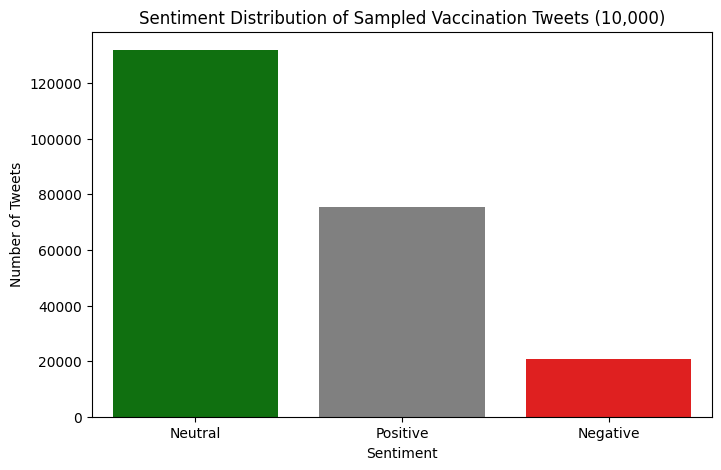

In [8]:
# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green', 'gray', 'red'])
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.title("Sentiment Distribution of Sampled Vaccination Tweets (10,000)")
plt.show()

In [9]:
# Display sentiment distribution
print(sentiment_counts)

sentiment
Neutral     131904
Positive     75501
Negative     20802
Name: count, dtype: int64


In [12]:
# Generate Word Clouds for Each Sentiment
def generate_wordcloud(sentiment):
    text = " ".join(df[df['sentiment'] == sentiment]['text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment} Tweets")
    plt.show()

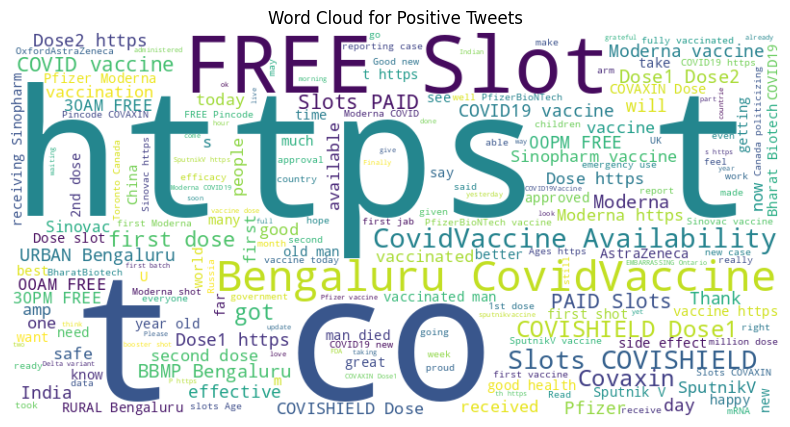

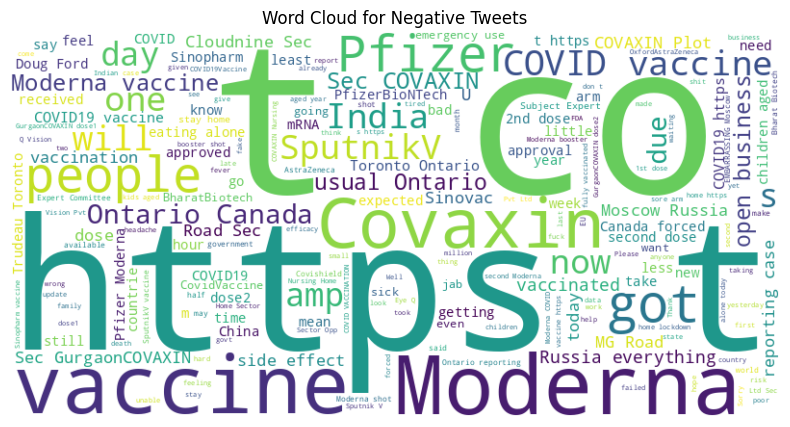

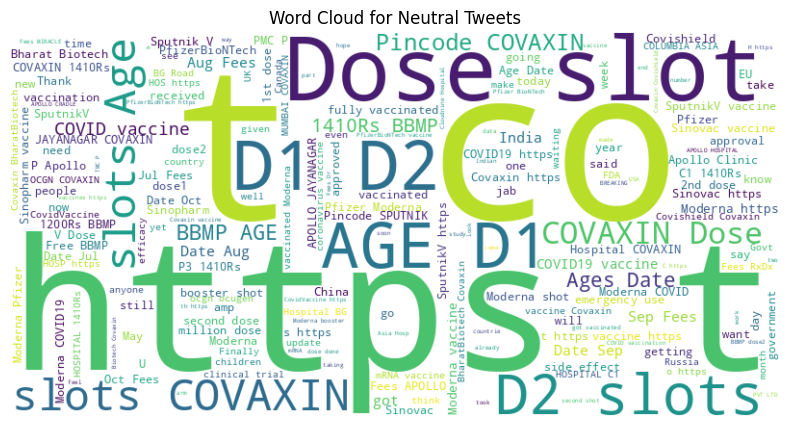

In [13]:
# Generate word clouds for each sentiment category
generate_wordcloud('Positive')
generate_wordcloud('Negative')
generate_wordcloud('Neutral')

In [14]:
# Analyze Top Hashtags
df['hashtags'] = df['text'].str.findall(r'#\w+')
hashtag_series = pd.Series([tag for tags in df['hashtags'] for tag in tags])
top_hashtags = hashtag_series.value_counts().head(10)

<ipython-input-15-573c0ae43045>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hashtags.index, y=top_hashtags.values, palette='Blues_r')


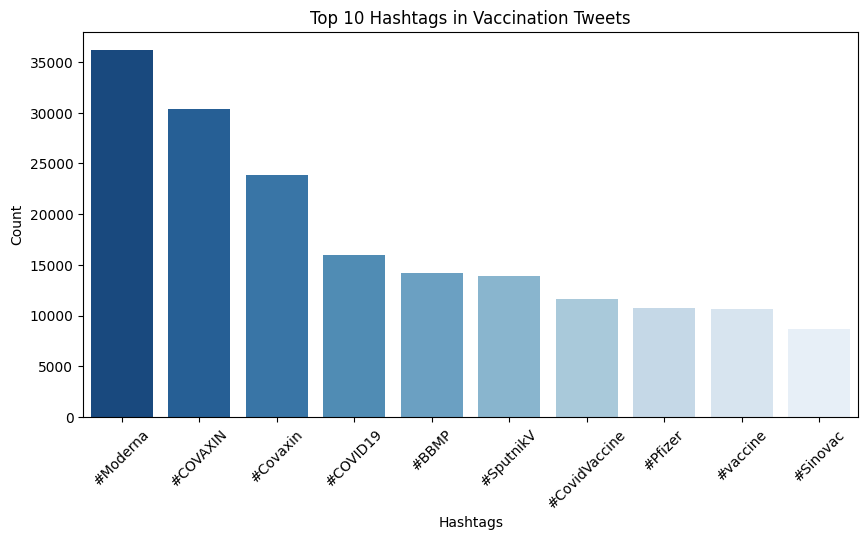

In [15]:
# Plot Top Hashtags
plt.figure(figsize=(10, 5))
sns.barplot(x=top_hashtags.index, y=top_hashtags.values, palette='Blues_r')
plt.xlabel("Hashtags")
plt.ylabel("Count")
plt.title("Top 10 Hashtags in Vaccination Tweets")
plt.xticks(rotation=45)
plt.show()

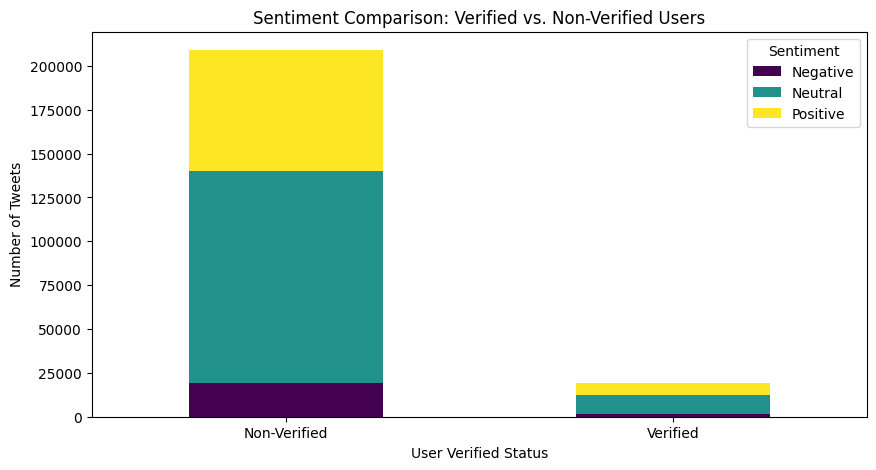

In [18]:
# Compare Sentiment of Verified vs. Non-Verified Users
if 'user_verified' in df.columns:
    sentiment_verified = df.groupby(['user_verified', 'sentiment']).size().unstack().fillna(0)
    sentiment_verified.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='viridis')
    plt.xlabel("User Verified Status")
    plt.ylabel("Number of Tweets")
    plt.title("Sentiment Comparison: Verified vs. Non-Verified Users")
    plt.xticks(ticks=[0,1], labels=['Non-Verified', 'Verified'], rotation=0)
    plt.legend(title="Sentiment")
    plt.show()

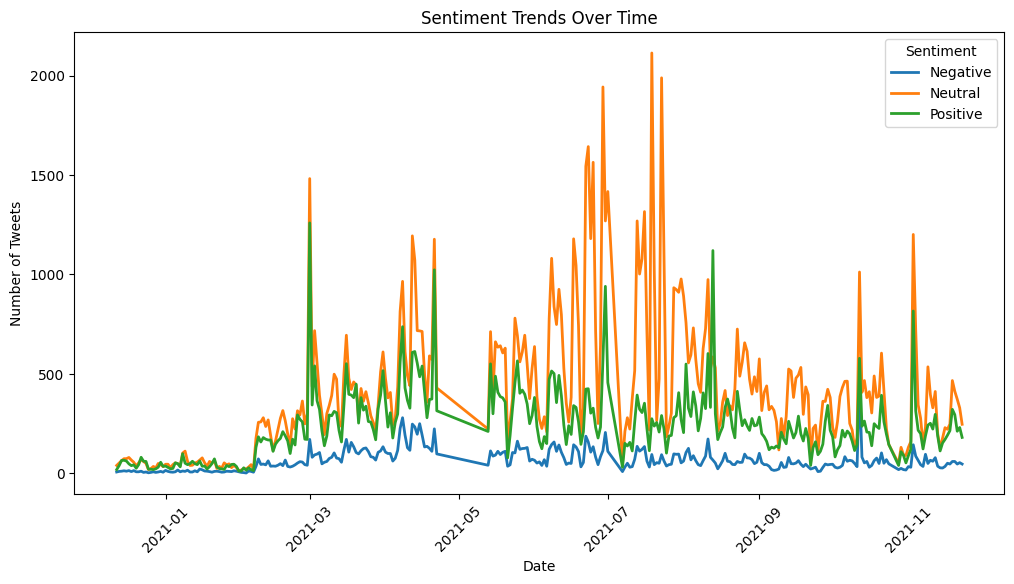

In [19]:
# Time-Based Sentiment Analysis
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    sentiment_over_time = df.groupby([df['date'].dt.date, 'sentiment']).size().unstack().fillna(0)
    sentiment_over_time.plot(figsize=(12, 6), linewidth=2)
    plt.xlabel("Date")
    plt.ylabel("Number of Tweets")
    plt.title("Sentiment Trends Over Time")
    plt.legend(title="Sentiment")
    plt.xticks(rotation=45)
    plt.show()

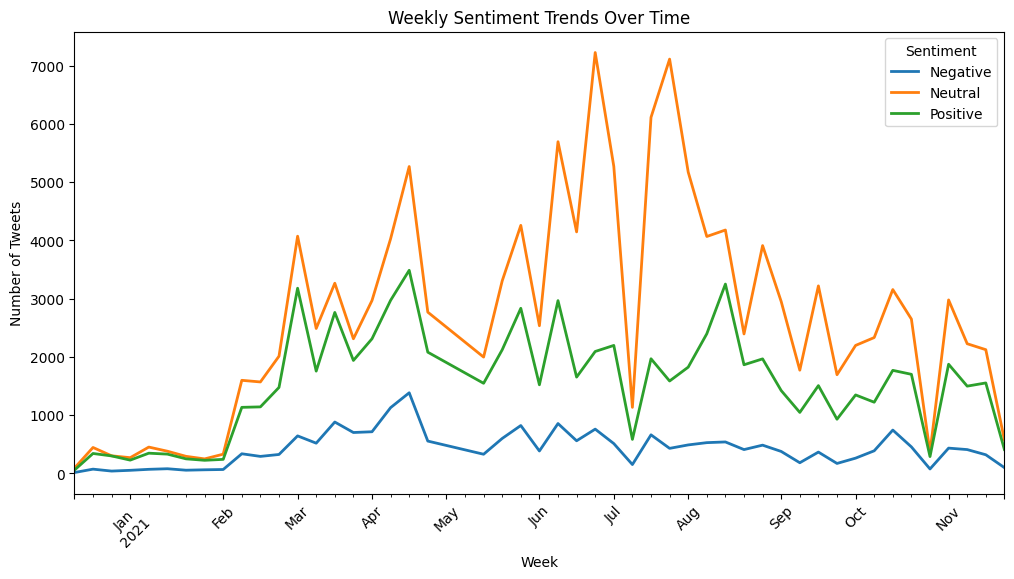

In [22]:
# Time-Based Sentiment Analysis
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df['week'] = df['date'].dt.to_period("W")
    # Weekly Sentiment Trends # This line was previously indented, causing the error.
    sentiment_weekly = df.groupby(['week', 'sentiment']).size().unstack().fillna(0)
    sentiment_weekly.plot(figsize=(12, 6), linewidth=2)
    plt.xlabel("Week")
    plt.ylabel("Number of Tweets")
    plt.title("Weekly Sentiment Trends Over Time")
    plt.legend(title="Sentiment")
    plt.xticks(rotation=45)
    plt.show()

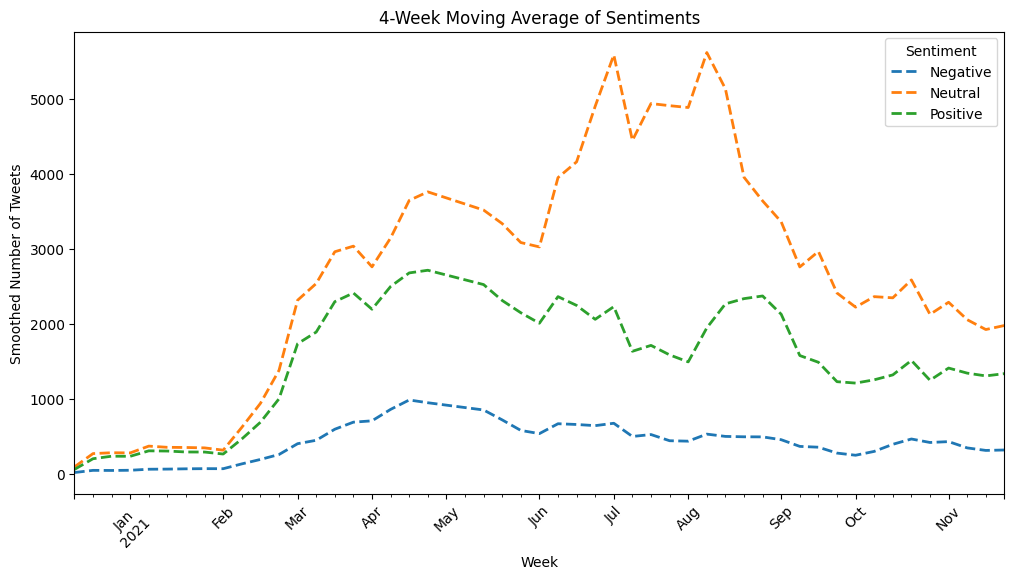

In [24]:
# Moving Average of Sentiments
sentiment_moving_avg = sentiment_weekly.rolling(window=4, min_periods=1).mean() # This line was previously indented, causing the error
sentiment_moving_avg.plot(figsize=(12, 6), linewidth=2, linestyle='dashed')
plt.xlabel("Week")
plt.ylabel("Smoothed Number of Tweets")
plt.title("4-Week Moving Average of Sentiments")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.show()